# modelos 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:

df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')
df_historico

,Temperatura (°C),Humedad,Edad,Peso (Kg),Distancia (Km),Deporte,Clima_Lluvioso,Clima_Nublado,Clima_Soleado,Genero_Hombre,...,Sóftbol,Tai chi,Tenis,Tenis de mesa,Tenis en pareja,Ultimate frisbee,Voleibol,Voleibol acuático,Waterpolo,Yoga
0,12,59,58,50.80,16.16,1,1,0,0,0,...,254.10160,0.00000,381.15240,203.14920,0.00000,406.60320,0.00000,152.34920,0.00000,203.14920
1,26,43,56,89.11,19.74,1,0,0,1,0,...,445.72822,356.35089,0.00000,356.35089,534.48178,713.23644,713.23644,267.24089,891.45644,356.35089
2,22,35,30,56.22,12.16,1,1,0,0,0,...,281.21244,224.82378,421.81866,224.82378,337.20756,449.98488,0.00000,168.60378,562.42488,0.00000
3,39,32,28,89.88,2.10,1,1,0,0,1,...,0.00000,359.43012,0.00000,0.00000,539.10024,0.00000,0.00000,0.00000,0.00000,0.00000
4,13,45,63,80.80,13.11,0,0,0,1,0,...,404.16160,0.00000,0.00000,0.00000,0.00000,646.72320,646.72320,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,46,53,78.31,2.93,1,0,1,0,0,...,391.70662,313.16169,587.55993,313.16169,469.70338,626.79324,626.79324,0.00000,783.41324,313.16169
996,13,53,49,50.31,10.75,0,0,1,0,0,...,251.65062,201.18969,377.47593,201.18969,301.75938,402.68124,402.68124,150.87969,503.30124,0.00000
997,35,50,49,53.09,2.64,0,1,0,0,0,...,265.55618,0.00000,398.33427,212.30691,318.43382,424.93236,0.00000,0.00000,0.00000,212.30691
998,21,80,21,76.77,4.46,1,1,0,0,1,...,384.00354,307.00323,576.00531,307.00323,460.46646,614.46708,614.46708,230.23323,768.00708,307.00323


In [3]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperatura (°C)           1000 non-null   int64  
 1   Humedad                    1000 non-null   int64  
 2   Edad                       1000 non-null   int64  
 3   Peso (Kg)                  1000 non-null   float64
 4   Distancia (Km)             1000 non-null   float64
 5   Deporte                    1000 non-null   int64  
 6   Clima_Lluvioso             1000 non-null   int64  
 7   Clima_Nublado              1000 non-null   int64  
 8   Clima_Soleado              1000 non-null   int64  
 9   Genero_Hombre              1000 non-null   int64  
 10  Genero_Mujer               1000 non-null   int64  
 11  Condicion_0                1000 non-null   int64  
 12  Condicion_1                1000 non-null   int64  
 13  Condicion_2                1000 non-null   int64 

In [4]:
df_historico.describe()

,Temperatura (°C),Humedad,Edad,Peso (Kg),Distancia (Km),Deporte,Clima_Lluvioso,Clima_Nublado,Clima_Soleado,Genero_Hombre,...,Sóftbol,Tai chi,Tenis,Tenis de mesa,Tenis en pareja,Ultimate frisbee,Voleibol,Voleibol acuático,Waterpolo,Yoga
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.106000,54.887000,42.07300,75.519410,10.214050,0.499000,0.319000,0.326000,0.355000,0.494000,...,205.731360,156.710093,283.760084,161.245199,237.203266,318.767224,317.136489,119.127957,390.863583,161.551282
std,8.736079,14.468503,13.89182,14.227353,5.567178,0.500249,0.466322,0.468982,0.478753,0.500214,...,196.136892,155.966794,291.893275,155.858253,233.165612,313.624168,313.004019,117.067680,393.257451,156.356756
min,10.000000,30.000000,18.00000,50.100000,0.530000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,43.000000,30.00000,63.650000,5.470000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,54.000000,42.50000,75.995000,10.255000,0.000000,0.000000,0.000000,0.000000,0.000000,...,268.707440,207.048225,377.400900,213.166695,313.275540,418.649220,417.368580,156.757730,511.604560,213.166695
75%,32.250000,67.000000,54.00000,87.880000,15.025000,1.000000,1.000000,1.000000,1.000000,1.000000,...,391.544055,307.633073,566.589045,306.653317,459.491785,619.329510,616.848270,231.470318,773.259180,310.362390
max,40.000000,80.000000,65.00000,99.880000,19.980000,1.000000,1.000000,1.000000,1.000000,1.000000,...,499.249620,399.140190,748.949460,399.140190,598.720360,798.959280,798.959280,299.360180,998.499240,399.180180


In [12]:


# Verificar si las variables son binarias o escalares
for column in df_historico.columns:
    unique_values = df_historico[column].nunique()
    if unique_values == 2:
        print(f"{column} es una variable binaria.")
    else:
        print(f"{column} es una variable escalar con {unique_values} valores únicos.")


Temperatura (°C) es una variable escalar con 31 valores únicos.
Humedad es una variable escalar con 51 valores únicos.
Edad es una variable escalar con 48 valores únicos.
Peso (Kg) es una variable escalar con 917 valores únicos.
Distancia (Km) es una variable escalar con 785 valores únicos.
Deporte es una variable binaria.
Clima_Lluvioso es una variable binaria.
Clima_Nublado es una variable binaria.
Clima_Soleado es una variable binaria.
Genero_Hombre es una variable binaria.
Genero_Mujer es una variable binaria.
Condicion_0 es una variable binaria.
Condicion_1 es una variable binaria.
Condicion_2 es una variable binaria.
Objetivo_0 es una variable binaria.
Objetivo_1 es una variable binaria.
Objetivo_2 es una variable binaria.
Aeróbicos es una variable escalar con 525 valores únicos.
Aeróbicos acuáticos es una variable escalar con 472 valores únicos.
Artes marciales es una variable escalar con 482 valores únicos.
Atletismo es una variable escalar con 485 valores únicos.
BMX es una va

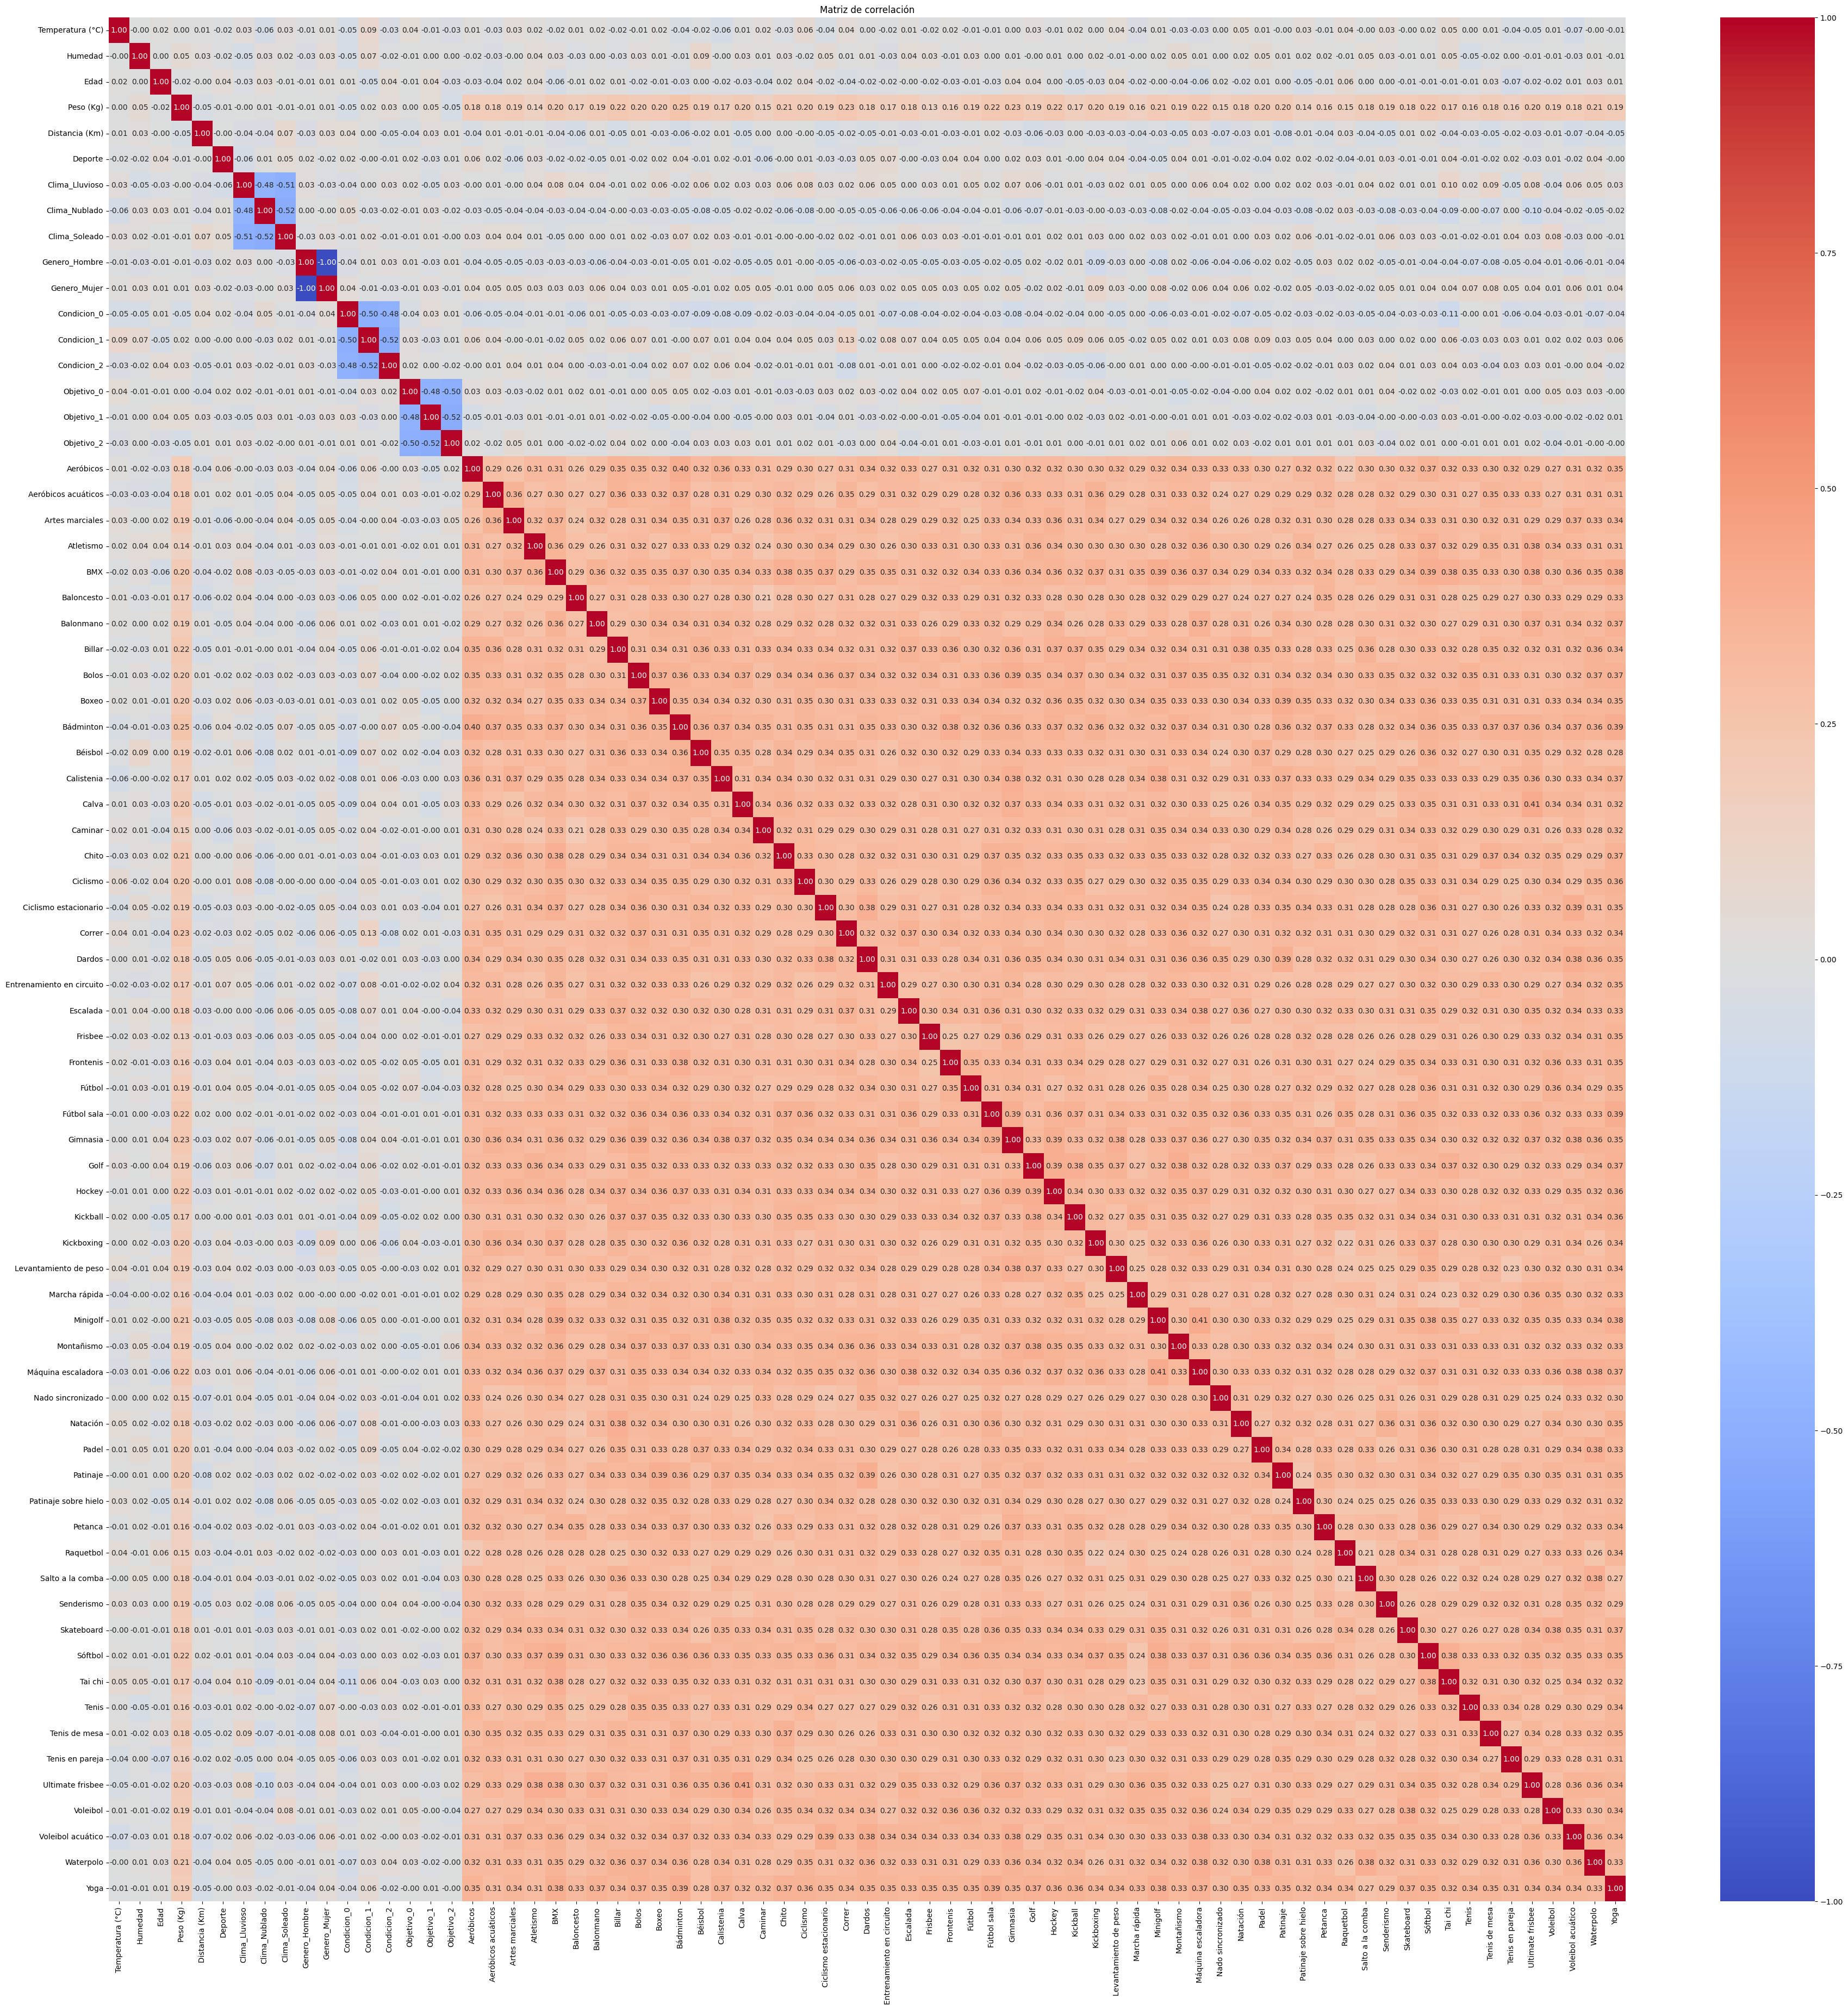

In [33]:
# Calcular la matriz de correlación
correlation_matrix = df_historico.corr()

# Crear el gráfico de heatmap
plt.figure(figsize=(45, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# RandomForestClassifier 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los posibles valores de hiperparámetros a probar en el GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Crear el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Obtener la recomendación de deporte para cada persona en el conjunto de prueba
deporte_recomendado = grid_search.predict(X_test)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Deporte recomendado para cada persona en el conjunto de prueba:")
print(deporte_recomendado[0])

# Evaluar el rendimiento del modelo
print("\nEvaluación del modelo:")
y_pred = grid_search.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

In [4]:
import pickle

import os

folder = "modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "Randomforest.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# GradientBoostingClassifier

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('model', GradientBoostingClassifier(random_state=42))  # Modelo GradientBoostingClassifier
])

# Definir los posibles valores de hiperparámetros a probar en el GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 5, 7]
}

# Usar GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Obtener la recomendación de deporte para cada persona en el conjunto de prueba
deporte_recomendado = grid_search.predict(X_test)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Deporte recomendado para cada persona en el conjunto de prueba:")
print(deporte_recomendado[0])

# Evaluar el rendimiento del modelo
print("\nEvaluación del modelo:")
y_pred = grid_search.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import pickle

import os

# Supongamos que quieres guardar el modelo en la carpeta "modelos"
# dentro del directorio actual
folder = "../modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "GradientBoosting.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)


# SVC

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los posibles valores de hiperparámetros a probar en el GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Crear el modelo SVC
model = SVC(random_state=42)

# Usar GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Obtener la recomendación de deporte para cada persona en el conjunto de prueba
deporte_recomendado = grid_search.predict(X_test_scaled)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Deporte recomendado para cada persona en el conjunto de prueba:")
print(deporte_recomendado[0])

# Evaluar el rendimiento del modelo
print("\nEvaluación del modelo:")
y_pred = grid_search.predict(X_test_scaled)
print("Precisión:", accuracy_score(y_test, y_pred))

Accuracy: 0.4975124378109453
Precision: 0.5109567901234568
Recall: 0.5107380520266183
ROC AUC: 0.5107380520266183


In [24]:
folder = "modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "svc.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# AdaBoostClassifier

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo AdaBoostClassifier con hiperparámetros de regularización
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la recomendación de deporte para cada persona en el conjunto de prueba
deporte_recomendado = model.predict(X_test)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Deporte recomendado para cada persona en el conjunto de prueba:")
print(deporte_recomendado[0])


Deporte recomendado para cada persona en el conjunto de prueba:
Yoga


In [9]:
folder = "modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "AdaBoostClassifier.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [27]:
folder = "modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "AdaBoostClassifier.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# GRADIENT


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Gradient Boosting Classifier con hiperparámetros de regularización
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Obtener la recomendación de deporte para cada persona en el conjunto de prueba
deporte_recomendado = model.predict(X_test)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Deporte recomendado para cada persona en el conjunto de prueba:")
print(deporte_recomendado[0])


Deporte recomendado para cada persona en el conjunto de prueba:
Levantamiento de peso


In [7]:
import pickle

import os

folder = "modelos_en_pkl"

# Asegúrate de que la carpeta exista. Si no existe, créala.
if not os.path.exists(folder):
    os.makedirs(folder)

# Ruta completa del archivo donde se guardará el modelo
filename = os.path.join(folder, "Mejor_modelo_Gradient.pkl")

# Guardar el modelo en el archivo
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Leer el DataFrame desde un archivo CSV
df_historico = pd.read_csv('../Raw_Datasets/datos_historicos_deportes.csv')

# Características (features) del modelo
X = df_historico.drop('Deporte', axis=1)
y = df_historico['Deporte']

# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Gradient Boosting Classifier con hiperparámetros de regularización
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Obtener las recomendaciones de deporte para cada persona en el conjunto de prueba
deporte_recomendado = model.predict(X_test)

# Imprimir el deporte recomendado para cada persona en el conjunto de prueba
print("Recomendaciones de deporte para cada persona en el conjunto de prueba:")
for i, deporte in enumerate(deporte_recomendado):
    print(f"Persona {i + 1}: {deporte}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")


Recomendaciones de deporte para cada persona en el conjunto de prueba:
Persona 1: Levantamiento de peso
Persona 2: Fútbol
Persona 3: Senderismo
Persona 4: Fútbol
Persona 5: Levantamiento de peso
Persona 6: Bádminton
Persona 7: Calva
Persona 8: Calva
Persona 9: Voleibol acuático
Persona 10: Natación
Persona 11: Sóftbol
Persona 12: Tenis en pareja
Persona 13: Kickboxing
Persona 14: Atletismo
Persona 15: Hockey
Persona 16: Ciclismo
Persona 17: Billar
Persona 18: Caminar
Persona 19: Salto a la comba
Persona 20: Voleibol acuático
Persona 21: Aeróbicos acuáticos
Persona 22: Caminar
Persona 23: Golf
Persona 24: Calva
Persona 25: Fútbol
Persona 26: Montañismo
Persona 27: Aeróbicos acuáticos
Persona 28: Voleibol acuático
Persona 29: Bádminton
Persona 30: Salto a la comba
Persona 31: Frontenis
Persona 32: Voleibol acuático
Persona 33: Fútbol sala
Persona 34: Frisbee
Persona 35: Yoga
Persona 36: Calva
Persona 37: Tenis
Persona 38: Yoga
Persona 39: Marcha rápida
Persona 40: Sóftbol
Persona 41: Fút